In [1]:
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
import astropy.units as u
from astropy.time import Time
import numpy as np

import matplotlib.pyplot as plt
from cartopy import crs

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (9, 6)

In [2]:
orm = EarthLocation.of_site('Roque de los Muchachos')

In [3]:
def valid_drive_az(az):
    '''Transform az in degrees to the range our drive can handle'''
    if az < -290:
        return az + 360
    if az > 80:
        return az - 360
    return az

In [4]:
star = SkyCoord.from_name('Cursa')

t = Time('2017-03-05 18:00') + np.arange(0, 5 * 60, 1) * u.minute
t1 = Time('2017-03-05 20:20')
t2 = Time('2017-03-05 20:45')

star_altaz = star.transform_to(AltAz(location=orm, obstime=t))
altaz1 = star.transform_to(AltAz(location=orm, obstime=t1))
altaz2 = star.transform_to(AltAz(location=orm, obstime=t2))

print(t1, 'az={:.5f}, zd={:.5f}'.format(valid_drive_az(altaz1.az.deg), 90 - altaz1.alt.deg))
print(t2, 'az={:.5f}, zd={:.5f}'.format(valid_drive_az(altaz2.az.deg), 90 - altaz2.alt.deg))

2017-03-05 20:20:00.000 az=-156.49426, zd=36.31182
2017-03-05 20:45:00.000 az=-147.18228, zd=38.91000


/home/maxnoe/.local/anaconda3/lib/python3.5/site-packages/cartopy/mpl/geoaxes.py:598: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f7d5edbb830> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/maxnoe/.local/anaconda3/lib/python3.5/site-packages/cartopy/mpl/geoaxes.py:598: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f7d5edbbd00> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


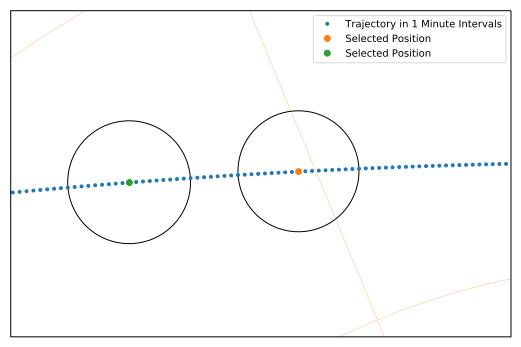

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=crs.NorthPolarStereo())

ax.plot(
    star_altaz.az.deg,
    star_altaz.alt.deg, 
    '.',
    transform=crs.PlateCarree(),
    label='Trajectory in 1 Minute Intervals',
)

for alt in np.arange(90, -1, -15, dtype=float):
    ax.plot(
        np.linspace(0, 360, 150),
        np.full(150, alt),
        transform=crs.PlateCarree(),
        color='C1',
        linewidth=0.5,
        alpha=0.5,
    )
    
for az in np.arange(0, 360, 22.5, dtype=float):
    ax.plot(
        np.full(150, az),
        np.linspace(0, 90, 150),
        transform=crs.PlateCarree(),
        color='C1',
        linewidth=0.5,
        alpha=0.5,
    )

for altaz in (altaz1, altaz2):
    az = altaz.az.deg
    alt = altaz.alt.deg
    ax.plot(az, alt, 'o', transform=crs.PlateCarree(), label='Selected Position')  
    ax.tissot(rad_km=250e3, lons=[az], lats=[alt], facecolor='none', color='k')
    
ax.legend()
    
ax.set_extent([190, 220, 50, 55])